### HR Analytics Plant EDA

#### Set source path to import code

In [1]:
%pwd

'C:\\Users\\t0272m1\\Projects\\HR Analytics'

In [2]:
source_path = 'E:\HR-Analytics\source'
source_path

'E:\\HR-Analytics\\source'

In [3]:
import os
os.chdir(source_path)
%pwd

'E:\\HR-Analytics\\source'

In [4]:
ls

 Volume in drive E is DATA
 Volume Serial Number is AEFF-63BE

 Directory of E:\HR-Analytics\source

07/10/2019  10:25 AM    <DIR>          .
07/10/2019  10:25 AM    <DIR>          ..
05/02/2019  11:01 AM                 2 __init__.py
05/16/2019  11:42 AM             8,585 __main__.py
07/10/2019  10:45 AM    <DIR>          __pycache__
06/27/2019  12:48 PM            17,158 base_table.py
06/13/2019  11:21 AM            26,727 calendrical.py
07/10/2019  11:14 AM             3,710 config_jnap.yml
07/10/2019  11:09 AM            12,961 config_shap.yml
06/03/2019  11:21 AM             4,713 config_shap2.yml
07/10/2019  11:18 AM             3,903 config_tac.yml
05/01/2019  11:07 AM               498 config_wap.yml
07/10/2019  11:24 AM             1,716 config_wtap.yml
05/17/2019  09:09 AM             6,131 database.py
06/13/2019  10:39 AM             8,672 main.py
07/01/2019  03:22 PM            32,727 model.py
04/30/2019  03:23 PM             2,842 pipeline.yml
05/01/2019  02:09 PM         

#### Imports

In [5]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Internal Python Packages
from main import get_pipeline_config
from main import get_plant_config

In [7]:
# Set Maximum Rows
pd.set_option('display.max_rows', 500)

#### Get specifications

In [8]:
pipeline_specs = get_pipeline_config(source_path)
pipeline_specs

{'datalake': {'schema': 'lab_datasci',
  'host': 'shbdmdwp001.servers.chrysler.com',
  'port': 5432,
  'user': 'datasci',
  'password': 'datasci_01',
  'database': 'odshawq'},
 'jdbc': {'driver': 'com.ibm.db2.jcc.DB2Driver',
  'server': 'jdbc:db2://SRVR1874.dbms.chrysler.com:18740/AUCERPTP',
  'user': 'datasci',
  'password': 'datasci_01',
  'jar_file': 'c:/installed/sqllib/java/db2jcc4.jar'},
 'holidays': {'calendar_us': ['2016-01-01',
   '2016-01-18',
   '2016-03-25',
   '2016-03-28',
   '2016-05-30',
   '2016-07-04',
   '2016-09-05',
   '2016-11-08',
   '2016-11-11',
   '2016-11-24',
   '2016-11-25',
   '2016-12-26',
   '2016-12-27',
   '2016-12-28',
   '2016-12-29',
   '2016-12-30',
   '2017-01-02',
   '2017-01-22',
   '2017-04-14',
   '2017-04-17',
   '2017-05-29',
   '2017-07-04',
   '2017-09-04',
   '2017-11-10',
   '2017-11-22',
   '2017-11-23',
   '2017-12-25',
   '2017-12-26',
   '2017-12-29',
   '2017-12-30',
   '2017-12-31',
   '2018-01-01',
   '2018-01-15',
   '2018-03-30'

In [9]:
plant_id = 'wtap'
plant_id

'wtap'

In [10]:
pipeline_specs['plant_id'] = plant_id
pipeline_specs['project_directory'] = source_path

In [11]:
plant_specs = get_plant_config(pipeline_specs)
plant_specs

{'plant': {'code': 2452,
  'shift_days': 5,
  'shift_hours': 8,
  'absence_codes': ['BERC',
   'BERE',
   'BERU',
   'BERX',
   'CARE',
   'CARU',
   'FMLA',
   'FMLD',
   'FMLU',
   'HOMD',
   'ILFE',
   'ILFU',
   'IPBE',
   'IPME',
   'IPNU',
   'IPSE',
   'JURE',
   'MISE',
   'MISU',
   'PERU',
   'PPAA',
   'PPAU',
   'TRAG',
   'WTRU'],
  'exclude_dates': [['2018-07-16', '2018-07-27'],
   ['2019-01-02', '2019-01-11'],
   ['2019-07-15', '2019-07-19'],
   ['2020-03-30', '2020-07-03']]},
 'base_table': {'start_date': datetime.date(2018, 1, 1),
  'end_date': None,
  'write_table': True},
 'model': {'target': 'absences_unplanned',
  'prediction_date': datetime.date(2019, 7, 14),
  'npreds': 5,
  'p_arima': 1,
  'd_arima': 0,
  'q_arima': 0,
  'top_features': 5,
  'band_pct': 0.3,
  'levels': ['crew', 'production_line'],
  'crews': ['A', 'B'],
  'departments': {'Trim': '9151',
   'Chassis': '9170',
   'Final': '9171',
   'Reprocess': '9190'},
  'production_lines': {'Trim': ['Trim', []

#### Table Parameters

In [12]:
pwd

'E:\\HR-Analytics\\source'

In [13]:
data_path = 'E:/HR-Analytics/data/'

In [14]:
table_date = '20190714'
table_date

'20190714'

#### Base Table

In [ ]:
table_name = '_'.join(['abs', plant_id, 'base', table_date, 'tbl'])
table_name

In [ ]:
# input_file is a non-lagged base table
file_name = '.'.join([table_name, 'csv'])
file_path = '/'.join([data_path, file_name])
df_base = pd.read_csv(file_path, low_memory=False)

In [ ]:
df_base.shape

In [ ]:
df_base.columns

#### Model Table

In [15]:
table_name = '_'.join(['abs', plant_id, 'model', table_date, 'tbl'])
table_name

'abs_wtap_model_20190714_tbl'

In [16]:
# input_file is a non-lagged base table
file_name = '.'.join([table_name, 'csv'])
file_path = '/'.join([data_path, file_name])
df = pd.read_csv(file_path, low_memory=False)

In [17]:
df.shape

(2942, 48)

In [18]:
df.columns

Index(['workdate', 'crew', 'production_line', 'group_total_cid', 'lost_hours',
       'actual_hours', 'paa_hours', 'absences_unplanned', 'absences_late',
       'absences_noshow', 'absences_any', 'mean_absence_pct',
       'mean_experience', 'absences_planned', 'home_canvasses',
       'absences_fmla', 'peia_count', 'tpt_count', 'streak_1', 'streak_2',
       'streak_3', 'streak_4_plus', 'cluster', 'group_total', 'tpt_unplanned',
       'tpt_extra', 'absences_unplanned_rolling_sum_5',
       'absences_unplanned_rolling_median_5',
       'absences_unplanned_rolling_sum_12',
       'absences_unplanned_rolling_median_12',
       'absences_unplanned_rolling_sum_20',
       'absences_unplanned_rolling_median_20', 'actual_hours_rolling_mean_20',
       'actual_hours_rolling_median_20', 'lost_hours_rolling_mean_20',
       'lost_hours_rolling_median_20', 'kp_residual_5', 'kp_residual_12',
       'kp_residual_20', 'year', 'quarter', 'month', 'week', 'day',
       'day_of_week', 'day_of_year', 

In [19]:
set(zip(df['crew'], df['production_line']))

{('A', 'Chassis'),
 ('A', 'Final'),
 ('A', 'Reprocess'),
 ('A', 'Trim'),
 ('B', 'Chassis'),
 ('B', 'Final'),
 ('B', 'Reprocess'),
 ('B', 'Trim')}

In [20]:
for f in df.columns:
    print(f, df[f].dtype)

workdate object
crew object
production_line object
group_total_cid int64
lost_hours float64
actual_hours float64
paa_hours float64
absences_unplanned int64
absences_late int64
absences_noshow int64
absences_any int64
mean_absence_pct float64
mean_experience float64
absences_planned int64
home_canvasses int64
absences_fmla int64
peia_count int64
tpt_count int64
streak_1 int64
streak_2 int64
streak_3 int64
streak_4_plus int64
cluster int64
group_total int64
tpt_unplanned int64
tpt_extra int64
absences_unplanned_rolling_sum_5 int64
absences_unplanned_rolling_median_5 int64
absences_unplanned_rolling_sum_12 int64
absences_unplanned_rolling_median_12 float64
absences_unplanned_rolling_sum_20 int64
absences_unplanned_rolling_median_20 float64
actual_hours_rolling_mean_20 float64
actual_hours_rolling_median_20 float64
lost_hours_rolling_mean_20 float64
lost_hours_rolling_median_20 float64
kp_residual_5 float64
kp_residual_12 float64
kp_residual_20 float64
year int64
quarter int64
month int64


#### Exploratory Data Analysis (EDA)

In [21]:
df['workdate'].min(), df['workdate'].max()

('2018-01-02', '2019-07-08')

In [65]:
study_start_date = '2018-06-01'
study_end_date = '2019-06-30'
df = df[(df['workdate'] >= study_start_date) & (df['workdate'] <= study_end_date)]

In [66]:
df['workdate'].min(), df['workdate'].max()

('2018-06-01', '2019-06-28')

In [22]:
group_cols = ['crew', 'production_line']
group_cols

['crew', 'production_line']

In [23]:
x_column = 'workdate'
y_column = 'absences_unplanned'
x_column, y_column

('workdate', 'absences_unplanned')

In [67]:
test_crew = 'A'
test_pline = 'Trim'
df_test = df.query('crew == @test_crew').query('production_line == @test_pline')
df_test.sample(10)

,workdate,crew,production_line,group_total_cid,lost_hours,actual_hours,paa_hours,absences_unplanned,absences_late,absences_noshow,...,month,week,day,day_of_week,day_of_year,nth_kday,next_day_delta,workdate_dt,weekday_name,month_name
1770,2018-11-21,A,Trim,235,60.0,2094.0,16.0,8,1,7,...,11,47,21,2,325,3,5.0,2018-11-21,Wednesday,November
2657,2019-05-16,A,Trim,165,64.8,1307.4,52.0,9,1,8,...,5,20,16,3,136,3,1.0,2019-05-16,Thursday,May
2081,2019-02-01,A,Trim,226,88.1,1073.1,24.0,12,1,11,...,2,5,1,4,32,1,3.0,2019-02-01,Friday,February
869,2018-06-08,A,Trim,240,40.0,1889.3,32.0,5,0,5,...,6,23,8,4,159,2,3.0,2018-06-08,Friday,June
2801,2019-06-12,A,Trim,161,154.6,1399.4,56.0,19,1,18,...,6,24,12,2,163,2,1.0,2019-06-12,Wednesday,June
1786,2018-11-27,A,Trim,233,105.0,2077.5,28.0,13,0,13,...,11,48,27,1,331,4,1.0,2018-11-27,Tuesday,November
2641,2019-05-14,A,Trim,160,89.2,1275.9,48.0,13,2,11,...,5,20,14,1,134,2,1.0,2019-05-14,Tuesday,May
2305,2019-03-13,A,Trim,226,64.0,1609.0,16.0,8,0,8,...,3,11,13,2,72,2,1.0,2019-03-13,Wednesday,March
1306,2018-08-28,A,Trim,237,40.2,2050.9,12.0,6,1,5,...,8,35,28,1,240,4,1.0,2018-08-28,Tuesday,August
965,2018-06-26,A,Trim,237,65.6,2073.4,16.0,11,3,8,...,6,26,26,1,177,4,1.0,2018-06-26,Tuesday,June


In [68]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})
ndays = 30

(100, 4)


E:\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


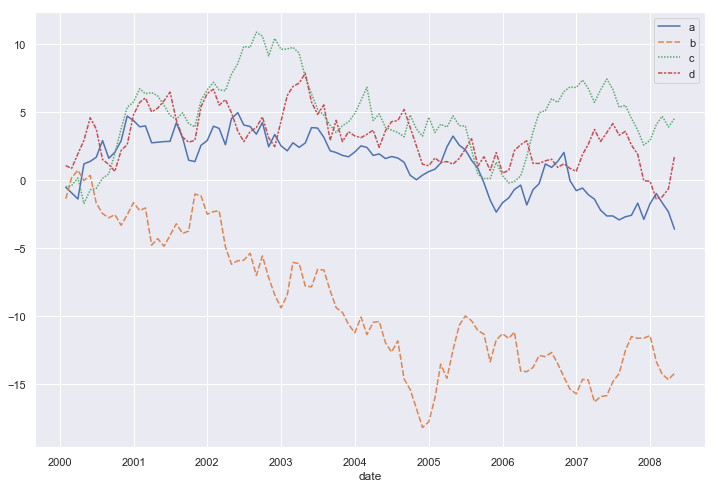

In [27]:
# Seaborn Multiple Series Example
index = pd.date_range("1 1 2000", periods=100, freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
print(data.shape)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sns.lineplot(data=wide_df)

In [33]:
def plot_counts(crew, pline, df_sub, xcol, ycol):
    # date formatting
    locator = mdates.MonthLocator()
    fmt = mdates.DateFormatter('%Y-%m')
    # plotting
    plt.figure()
    data = df_sub[ycol].values.reshape(-1, 1)
    # index = pd.date_range("1 1 2018", periods=data.shape[0], freq="d", name="date")
    df_wide = pd.DataFrame(data, range(data.shape[0]), [ycol])
    g = sns.lineplot(data=df_wide)
    title_string1 = str.upper(plant_id) + " Crew " + crew + ", Production Line: " + pline
    title_string2 = " from " + df_sub[xcol].min() + " to " + df_sub[xcol].max()
    g.set_title(title_string1 + title_string2)
    plt.show()

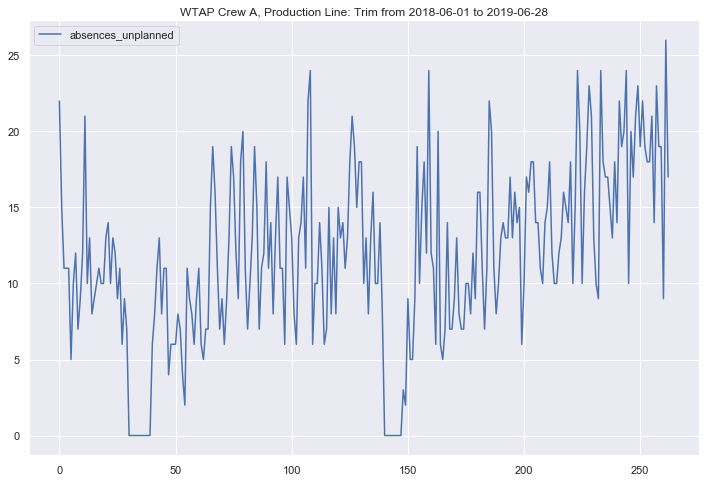

In [69]:
plot_counts(test_crew, test_pline, df_test, x_column, y_column)

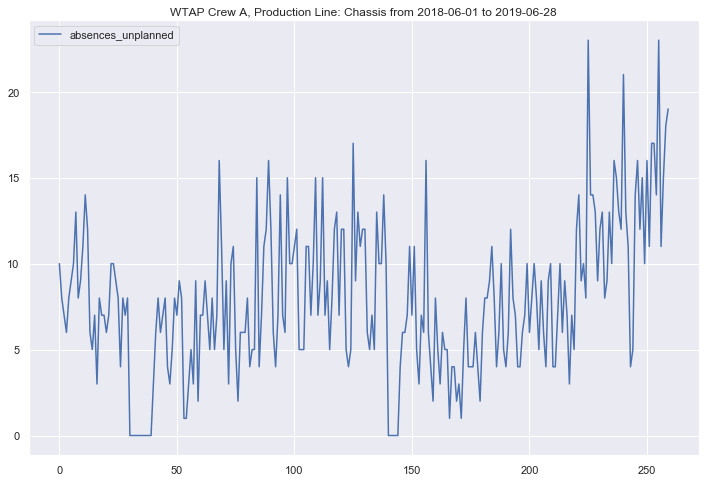

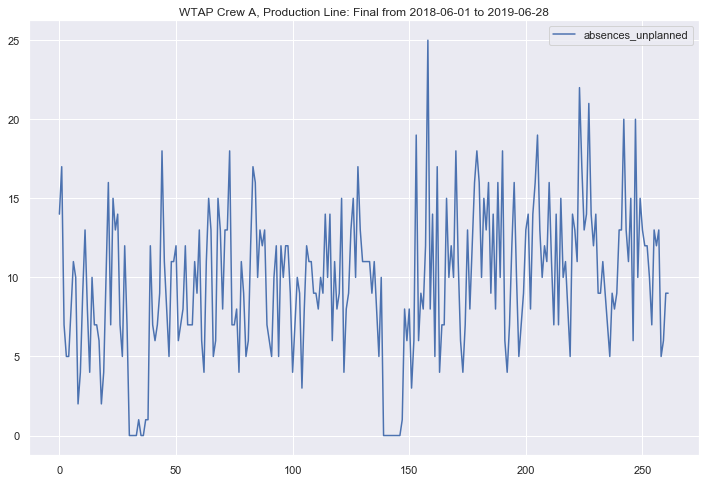

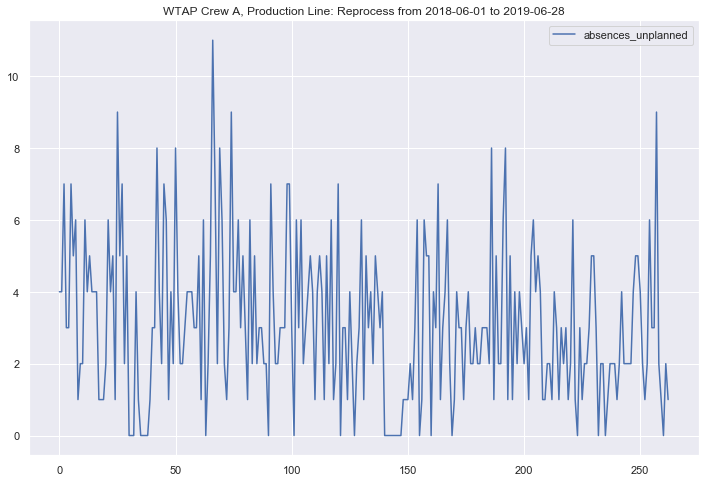

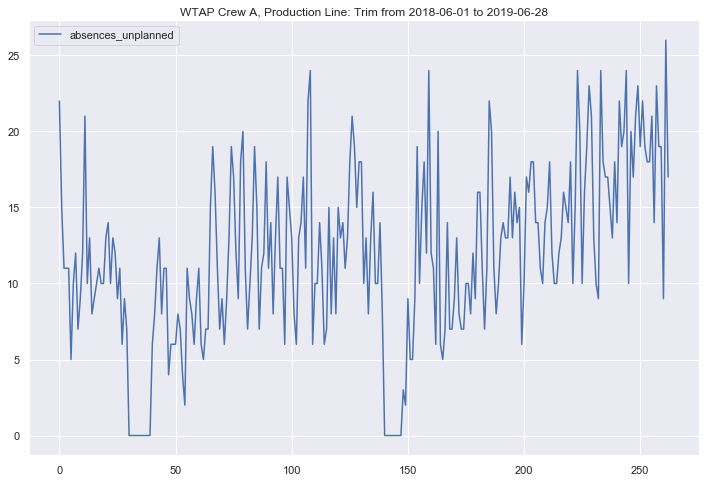

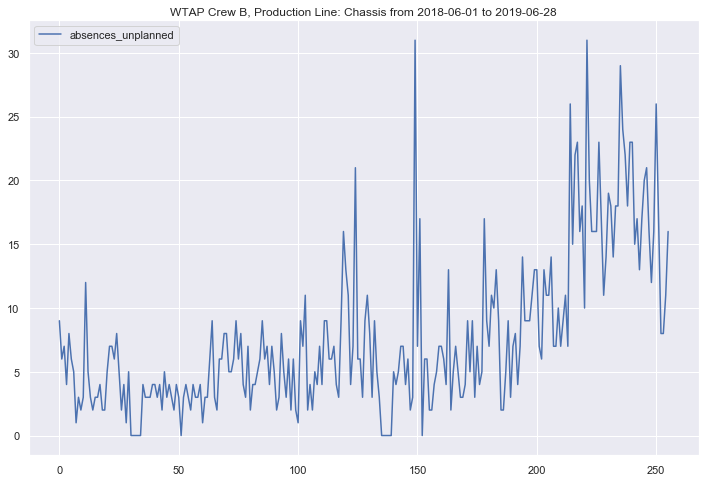

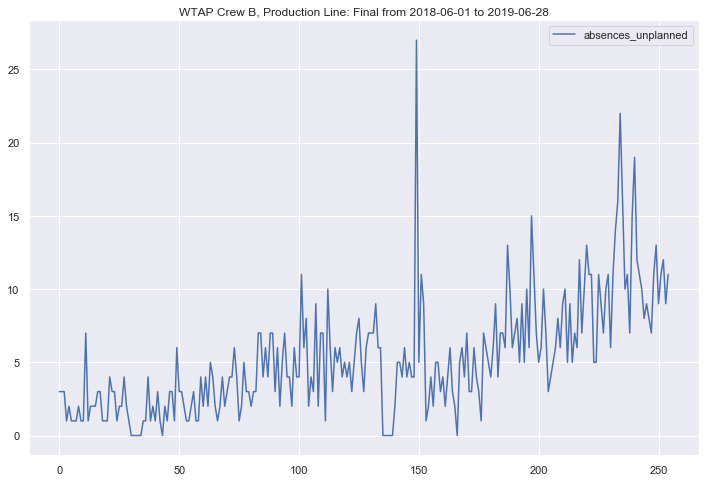

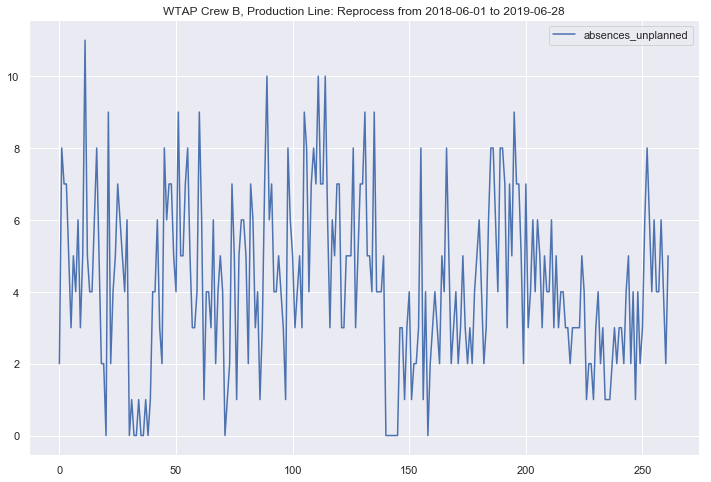

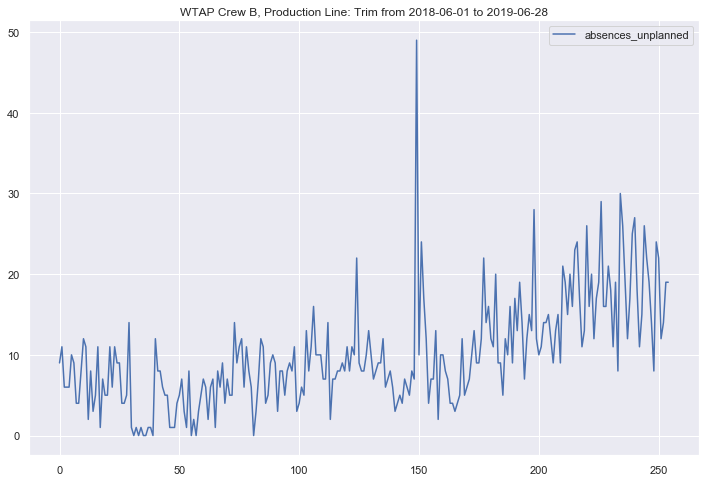

In [70]:
# This will generate plots for ALL crews and production lines.
for group, df_sub in df.groupby(group_cols):
    crew = group[0]
    pline = group[1]
    if (pline != ' '):
        plot_counts(crew, pline, df_sub, x_column, y_column)

In [71]:
def plot_all_counts(df, xcol, ycol, title_string):
    # roll up by date
    df_all = df.groupby(xcol)[ycol].agg('sum').reset_index()
    # date formatting
    locator = mdates.MonthLocator()
    fmt = mdates.DateFormatter('%Y-%m')
    # plotting
    plt.figure()
    data = df_all[ycol].values.reshape(-1, 1)
    df_wide = pd.DataFrame(data, range(data.shape[0]), [ycol])
    g = sns.lineplot(data=df_wide)
    title_string1 = str.upper(plant_id) + " " + title_string
    title_string2 = " from " + df_all[xcol].min() + " to " + df_all[xcol].max()
    g.set_title(title_string1 + title_string2)
    plt.show()

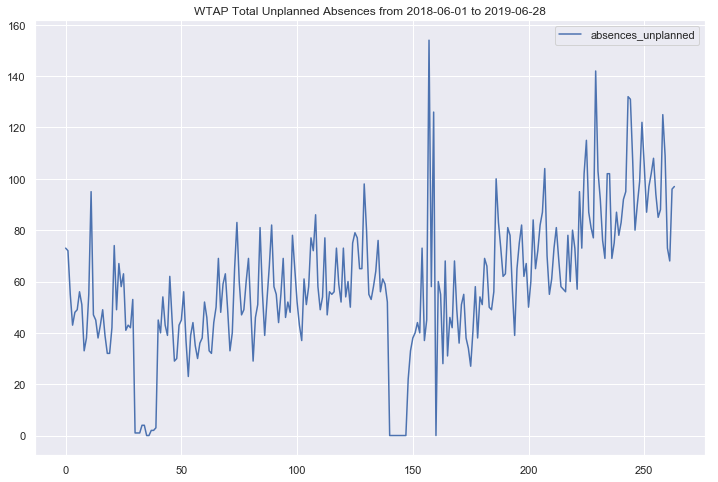

In [72]:
plot_all_counts(df, x_column, y_column, 'Total Unplanned Absences')

In [73]:
agg_dict = {'group_total'        : {'group_total_cid' : 'sum'},
            'absences_unplanned' : {'absences_unplanned' : 'sum'}
           }
agg_dict

{'group_total': {'group_total_cid': 'sum'},
 'absences_unplanned': {'absences_unplanned': 'sum'}}

In [74]:
# roll up by date
df_date = df.groupby(x_column).agg(agg_dict).reset_index()
df_date.columns = [x[0] for x in list(df_date.columns.values)]
df_date['absences_unplanned_pct'] = 100 * df_date['absences_unplanned'] / df_date['group_total']
df_date.sample(10)

,workdate,group_total,absences_unplanned,absences_unplanned_pct
96,2018-10-17,1286,52,4.043546
254,2019-06-17,862,108,12.529002
203,2019-04-02,1182,65,5.499154
202,2019-04-01,1157,84,7.260156
93,2018-10-12,1112,55,4.946043
39,2018-07-27,80,3,3.750000
116,2018-11-16,1270,56,4.409449
223,2019-05-02,945,73,7.724868
87,2018-10-04,1292,53,4.102167
224,2019-05-03,923,102,11.050921


In [75]:
def plot_percentages(df, nbins, ycol):
    sns.set()
    g = sns.distplot(df[ycol], bins=nbins)
    title_string = "Distribution of Unplanned Absences (%)"
    g.set_title(title_string)

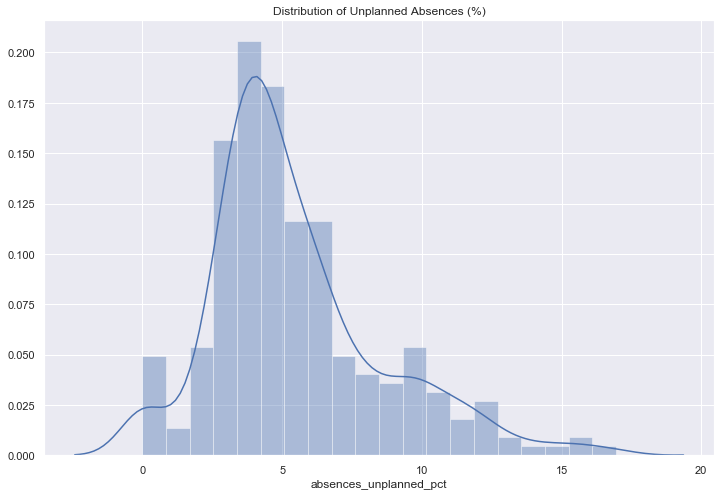

In [76]:
nbins = 20
plot_percentages(df_date, nbins, 'absences_unplanned_pct')

In [77]:
df.columns

Index(['workdate', 'crew', 'production_line', 'group_total_cid', 'lost_hours',
       'actual_hours', 'paa_hours', 'absences_unplanned', 'absences_late',
       'absences_noshow', 'absences_any', 'mean_absence_pct',
       'mean_experience', 'absences_planned', 'home_canvasses',
       'absences_fmla', 'peia_count', 'tpt_count', 'streak_1', 'streak_2',
       'streak_3', 'streak_4_plus', 'cluster', 'group_total', 'tpt_unplanned',
       'tpt_extra', 'absences_unplanned_rolling_sum_5',
       'absences_unplanned_rolling_median_5',
       'absences_unplanned_rolling_sum_12',
       'absences_unplanned_rolling_median_12',
       'absences_unplanned_rolling_sum_20',
       'absences_unplanned_rolling_median_20', 'actual_hours_rolling_mean_20',
       'actual_hours_rolling_median_20', 'lost_hours_rolling_mean_20',
       'lost_hours_rolling_median_20', 'kp_residual_5', 'kp_residual_12',
       'kp_residual_20', 'year', 'quarter', 'month', 'week', 'day',
       'day_of_week', 'day_of_year', 

In [78]:
df['workdate_dt'] = pd.to_datetime(df['workdate'])
df['weekday_name'] = df['workdate_dt'].dt.weekday_name
df['month_name'] = df['workdate_dt'].dt.month_name()

Text(0.5, 1.0, 'Distribution of Unplanned Absences by Day (All Crews and Production Lines)')

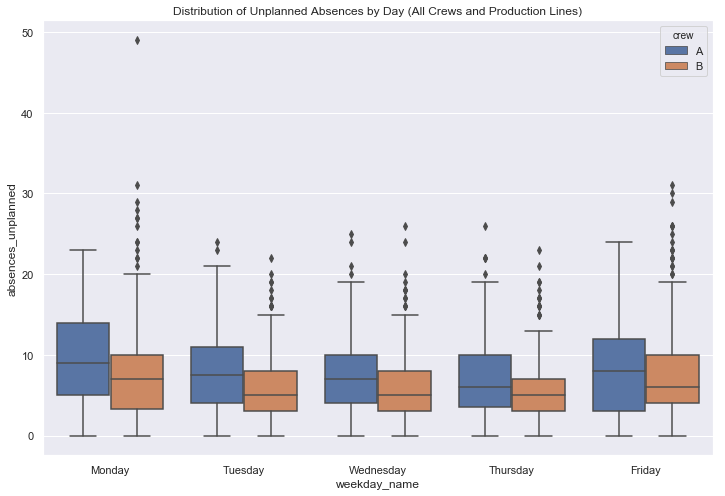

In [79]:
day_ordering = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
hue_ordering = ['A', 'B']
g = sns.boxplot(x="weekday_name", y=y_column, data=df, hue="crew", order=day_ordering, hue_order=hue_ordering)
title_string = "Distribution of Unplanned Absences by Day (All Crews and Production Lines)"
g.set_title(title_string)

Text(0.5, 1.0, 'Distribution of Unplanned Absences by Month (All Crews and Production Lines)')

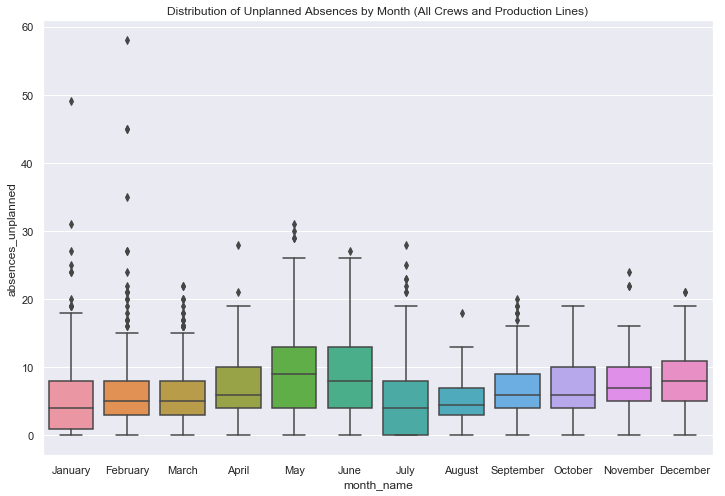

In [46]:
g = sns.boxplot(x="month_name", y=y_column, data=df)
title_string = "Distribution of Unplanned Absences by Month (All Crews and Production Lines)"
g.set_title(title_string)

Text(0.5, 1.0, 'Distribution of FMLA Absences by Month (All Crews and Production Lines)')

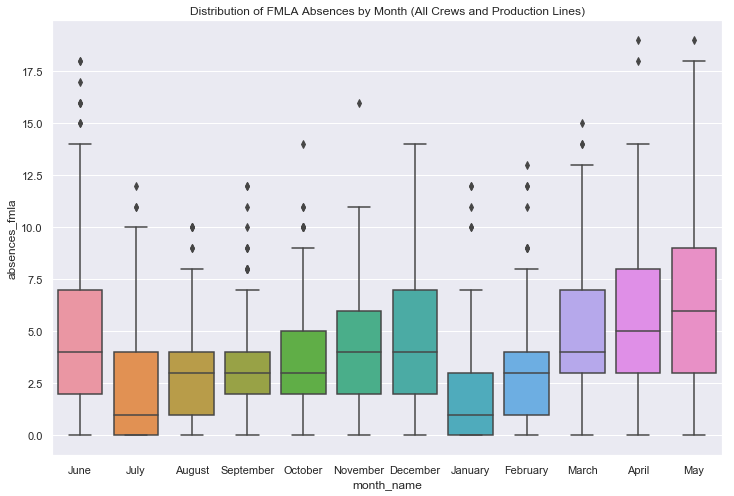

In [80]:
g = sns.boxplot(x="month_name", y='absences_fmla', data=df)
title_string = "Distribution of FMLA Absences by Month (All Crews and Production Lines)"
g.set_title(title_string)

In [48]:
agg_dict = {'group_total'        : {'group_total_cid' : 'sum'},
            'absences_unplanned' : {'absences_unplanned' : 'sum'}
           }
agg_dict

{'group_total': {'group_total_cid': 'sum'},
 'absences_unplanned': {'absences_unplanned': 'sum'}}

In [81]:
# roll up by crew and production line
df_heat_agg = df.groupby(group_cols).agg(agg_dict).reset_index()
df_heat_agg.columns = group_cols + ['group_total', 'absences_unplanned']
df_heat_agg['absences_unplanned_pct'] = 100 * df_heat_agg['absences_unplanned'] / df_heat_agg['group_total']
df_heat_agg = df_heat_agg[df_heat_agg['production_line'] != ' ']
df_heat_agg

,crew,production_line,group_total,absences_unplanned,absences_unplanned_pct
0,A,Chassis,41629,2044,4.910039
1,A,Final,28670,2525,8.807115
2,A,Reprocess,18579,807,4.343614
3,A,Trim,50802,3106,6.113933
4,B,Chassis,42713,1973,4.619203
5,B,Final,29246,1338,4.574985
6,B,Reprocess,18734,1112,5.935732
7,B,Trim,51937,2546,4.902093


In [82]:
df_heat_pivot = df_heat_agg.pivot(index='production_line', columns='crew', values='absences_unplanned_pct')
df_heat_pivot

crew,A,B
production_line,,
Chassis,4.910039,4.619203
Final,8.807115,4.574985
Reprocess,4.343614,5.935732
Trim,6.113933,4.902093


Text(0.5, 1.0, 'Unplanned Absence Percentages from 2018-06-01 to 2019-06-30')

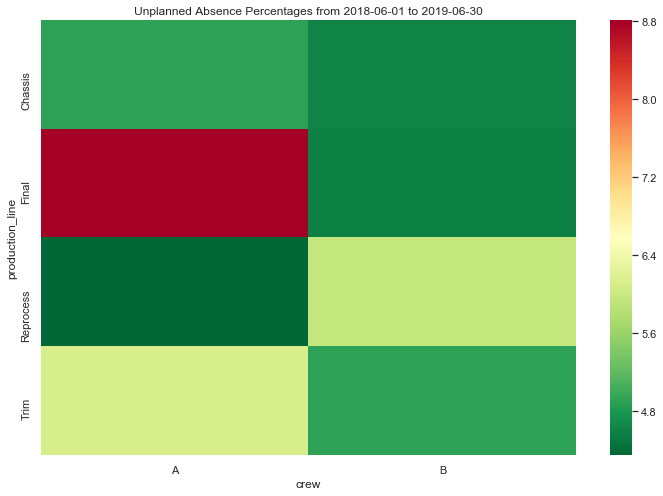

In [84]:
g = sns.heatmap(df_heat_pivot, cmap='RdYlGn_r')
title_string1 = "Unplanned Absence Percentages"
title_string2 = " from " + study_start_date + " to " + study_end_date
g.set_title(title_string1 + title_string2)

In [85]:
recent_start_date = '2019-04-01'
recent_end_date = '2019-06-30'
df_recent = df[(df['workdate'] >= recent_start_date) & (df['workdate'] <= recent_end_date)]

In [86]:
# roll up by crew and production line
df_heat_agg = df_recent.groupby(group_cols).agg(agg_dict).reset_index()
df_heat_agg.columns = group_cols + ['group_total', 'absences_unplanned']
df_heat_agg['absences_unplanned_pct'] = 100 * df_heat_agg['absences_unplanned'] / df_heat_agg['group_total']
df_heat_agg = df_heat_agg[df_heat_agg['production_line'] != ' ']
df_heat_agg

,crew,production_line,group_total,absences_unplanned,absences_unplanned_pct
0,A,Chassis,8610,683,7.932636
1,A,Final,6336,732,11.553030
2,A,Reprocess,3240,161,4.969136
3,A,Trim,9794,1031,10.526853
4,B,Chassis,9103,951,10.447105
5,B,Final,6368,584,9.170854
6,B,Reprocess,3184,221,6.940955
7,B,Trim,10919,1049,9.607107


In [87]:
df_heat_pivot = df_heat_agg.pivot(index='production_line', columns='crew', values='absences_unplanned_pct')
df_heat_pivot

crew,A,B
production_line,,
Chassis,7.932636,10.447105
Final,11.553030,9.170854
Reprocess,4.969136,6.940955
Trim,10.526853,9.607107


Text(0.5, 1.0, 'Unplanned Absence Percentages from 2019-04-01 to 2019-06-30')

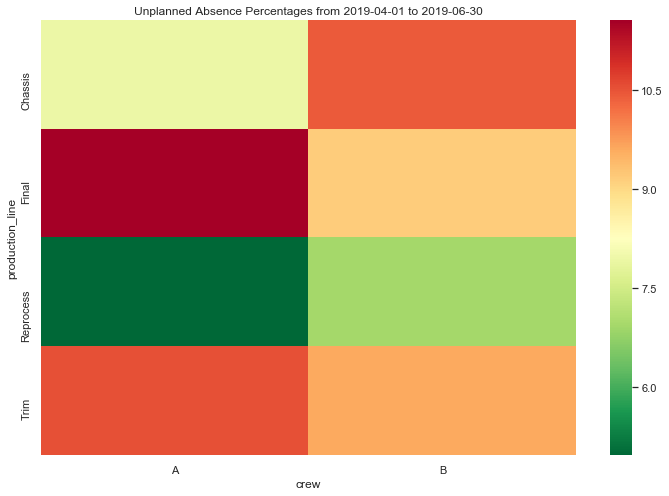

In [89]:
g = sns.heatmap(df_heat_pivot, cmap='RdYlGn_r')
title_string1 = "Unplanned Absence Percentages"
title_string2 = " from " + recent_start_date + " to " + recent_end_date
g.set_title(title_string1 + title_string2)

### End of Notebook